In [61]:
# implement noice reduction of old photo restoration
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [66]:
def noise_reduction(image_path):
    """
    Apply noise reduction to the image
    :param image_path: path to the image
    :return: noise reduced image
    """
    img_noise = cv2.imread(image_path)
    img_noise_rgb = cv2.cvtColor(img_noise, cv2.COLOR_BGR2RGB)

    gaussian_blur = cv2.GaussianBlur(img_noise, (5, 5), 0)
    gaussian_blur_rgb = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)

    median_blur = cv2.medianBlur(img_noise, 5)
    median_blur_rgb = cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)

    bilateral_filter = cv2.bilateralFilter(img_noise, 9, 100, 100)
    bilateral_filter_rgb = cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB)

    nonlocal_mean = cv2.fastNlMeansDenoisingColored(img_noise, None, 10, 10, 7, 21)
    nonlocal_mean_rgb = cv2.cvtColor(nonlocal_mean, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(14,8))
    tup = [
        ("Noise Image", img_noise_rgb),
        ("Gaussian Blur", gaussian_blur_rgb),
        ("Median Blur", median_blur_rgb),
        ("Bilateral Filter", bilateral_filter_rgb),
        ("Non-Local Means", nonlocal_mean_rgb)
    ]

    for i, (name, img) in enumerate(tup):
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(name)
        plt.axis('off')
        
    

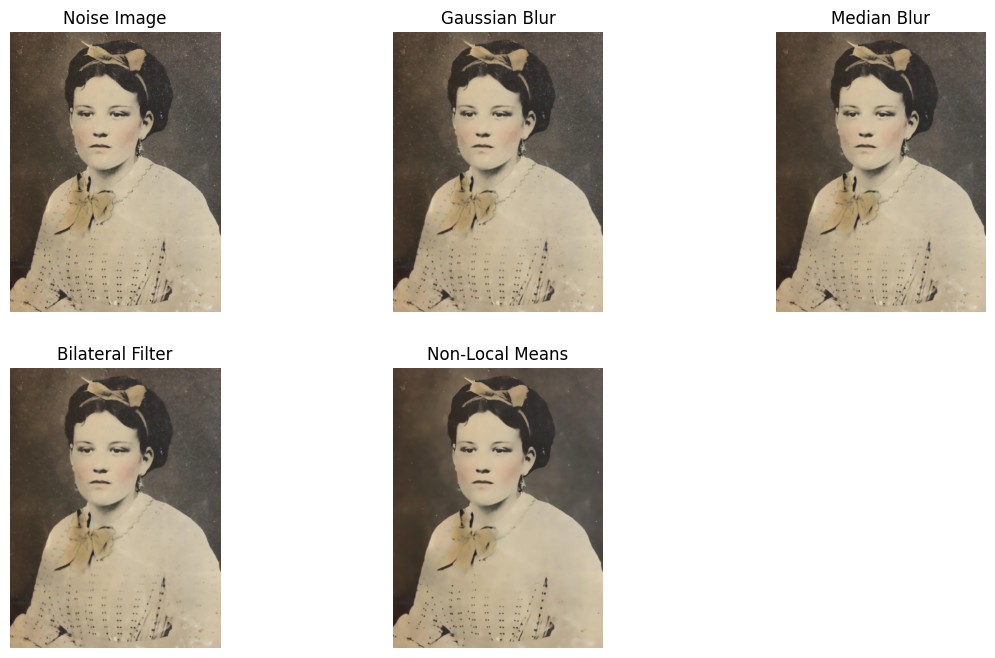

In [67]:
noise_reduction("old_photo_02.jpg")